In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("D:\RAVI\sem 5\K-NEarest-Neighbor-master\Classified Data",index_col=0)

In [49]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [50]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [34]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [35]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
pred = knn.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(confusion_matrix(y_test,pred))

[[133  12]
 [ 10 145]]


In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       145
           1       0.92      0.94      0.93       155

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [45]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

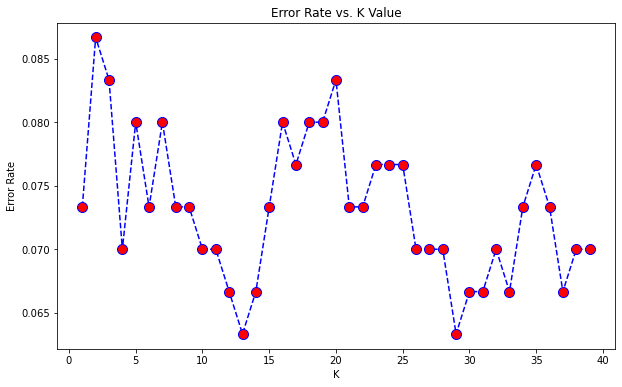

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[133  12]
 [ 10 145]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.92       145
           1       0.92      0.94      0.93       155

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [51]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[129  16]
 [  7 148]]


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       145
           1       0.90      0.95      0.93       155

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# SVM

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv(r'D:\RAVI\total\sem 5\data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [4]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 10)

In [5]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [6]:
# Creating instance of SVC
svc = SVC()

# Fitting the model
svc.fit(train_x, train_y)

SVC()

In [7]:
# Predicting over the Train Set
train_predict = svc.predict(train_x)
k = svc.score(train_x, train_y)
print('Training Score', k )

Training Score 0.6482035928143712


In [8]:
# Predicting over the Test
test_predict = svc.predict(test_x)
k = svc.score(test_x, test_y)
print('Test score    ', k )

Test score     0.726457399103139


# LINEAR REGRESSION

In [9]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [11]:
df = pd.read_csv(r'D:\downloads\New folder\homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [12]:
df.bedrooms.median()

4.0

In [13]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [14]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [15]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [16]:
reg.intercept_

221323.00186540408

In [17]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [18]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

In [19]:
reg.predict([[2500, 4, 5]])

array([578876.03748933])

# Data Manupulation using Panda

In [21]:
import pandas as pd

In [22]:
a = [1, 3, 5, 7, 9, 2, 4, 6, 8]
a1 = pd.Series(a)

In [23]:
print(a1)

0    1
1    3
2    5
3    7
4    9
5    2
6    4
7    6
8    8
dtype: int64


In [24]:
a1 = [1,3,5,7,9,2,4,6,8]
a2 = ['a','b','c','d','e','f','g','h','i']
a3 = pd.Series(a1,a2)
print(a3)
a3['b']

a    1
b    3
c    5
d    7
e    9
f    2
g    4
h    6
i    8
dtype: int64


3

In [25]:
dict1 = {'Oranges':3, 'Apples':4, 'Mangoes':2, 'Banana':12}
dict2 = pd.Series(dict1)
print (dict2)
print (type(dict2))

Oranges     3
Apples      4
Mangoes     2
Banana     12
dtype: int64
<class 'pandas.core.series.Series'>


In [26]:
Array1 = [[1,3,5],[2,4,6]]
Array2 = pd.Series(Array1)
print (Array2)

0    [1, 3, 5]
1    [2, 4, 6]
dtype: object


In [27]:
Data = {'Age':[23,33,12,45],'Name':['Rahul','John','Robert','Sneha']}
Data1 = pd.DataFrame(Data)
print(Data1)

   Age    Name
0   23   Rahul
1   33    John
2   12  Robert
3   45   Sneha


In [28]:
Data2 = [[4,1900],[3,1600],[2,1100],[1,850]]
Data3 = pd.DataFrame(Data2, columns = ['No_of_Bedrooms','Square_Feet'])
print (Data3)

   No_of_Bedrooms  Square_Feet
0               4         1900
1               3         1600
2               2         1100
3               1          850


In [29]:
Data4 = {'Name':['Ankit','Rishitha','Karthik','Vishnu'],'Marks':[78,67,98,56]}
Data5 = pd.DataFrame(Data4,index = ['Rank 2','Rank 3','Rank 1','Rank 4'])
print (Data5)

            Name  Marks
Rank 2     Ankit     78
Rank 3  Rishitha     67
Rank 1   Karthik     98
Rank 4    Vishnu     56


In [30]:
Data6 = [{'A':65,'B':66,'C':67},{'A':97,'B':98,'C':99}]
Data7 = pd.DataFrame(Data6)
print (Data7)


    A   B   C
0  65  66  67
1  97  98  99


In [31]:
import numpy as np
import pandas as pd
Data8 = pd.DataFrame({'A':1, 'B':pd.Timestamp('20190305'),'C':np.array([3]*4)
, 'D' : pd.Categorical(["Test","Train","Car","Bike"])
, 'E':'Hello, Welcome!'})
print(Data8)

   A          B  C      D                E
0  1 2019-03-05  3   Test  Hello, Welcome!
1  1 2019-03-05  3  Train  Hello, Welcome!
2  1 2019-03-05  3    Car  Hello, Welcome!
3  1 2019-03-05  3   Bike  Hello, Welcome!


In [32]:
LOL = pd.read_csv(r"D:\RAVI\total\sem 5\League_of_Legends.csv")
LOL

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [33]:
LOL.shape


(9879, 40)

In [34]:
LOL.head()


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [35]:
LOL.tail()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,...,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


In [36]:
LOL.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [37]:
LOL.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [38]:
LOL.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [39]:
LOL.loc[:,['gameId','redKills','blueKills']]

,gameId,redKills,blueKills
0,4519157822,6,9
1,4523371949,5,5
2,4521474530,11,7
3,4524384067,5,4
4,4436033771,6,6
...,...,...,...
9874,4527873286,4,7
9875,4527797466,4,6
9876,4527713716,7,6
9877,4527628313,3,2


In [40]:
LOL.iloc[0:2,2:5]

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood
0,28,2,1
1,12,1,0


In [41]:
LOL.max().head(10)

gameId                4.527991e+09
blueWins              1.000000e+00
blueWardsPlaced       2.500000e+02
blueWardsDestroyed    2.700000e+01
blueFirstBlood        1.000000e+00
blueKills             2.200000e+01
blueDeaths            2.200000e+01
blueAssists           2.900000e+01
blueEliteMonsters     2.000000e+00
blueDragons           1.000000e+00
dtype: float64

In [42]:
LOL.min().tail(12)

redDragons                         0.0
redHeralds                         0.0
redTowersDestroyed                 0.0
redTotalGold                   11212.0
redAvgLevel                        4.8
redTotalExperience             10465.0
redTotalMinionsKilled            107.0
redTotalJungleMinionsKilled        4.0
redGoldDiff                   -11467.0
redExperienceDiff              -8348.0
redCSPerMin                       10.7
redGoldPerMin                   1121.2
dtype: float64

In [44]:
print(LOL.shape)
LOL_temp = LOL.append(LOL)
print(LOL_temp.shape)

(9879, 40)
(19758, 40)


In [46]:
LOL = pd.read_csv(r"D:\RAVI\total\sem 5\League_of_Legends.csv")
LOL.isnull()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Data Visualization using Matplotlib

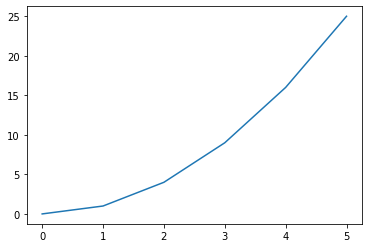

In [50]:
import matplotlib.pyplot as plt

x_values=[0,1,2,3,4,5]
squares=[0,1,4,9,16,25]

plt.plot(x_values,squares)
plt.savefig("testimage.jpeg")

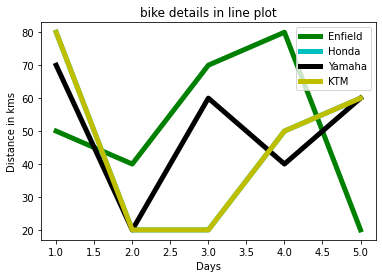

In [51]:
x=[1,2,3,4,5]
y=[50,40,70,80,20]
y2=[80,20,20,50,60]
y3=[70,20,60,40,60]
y4=[80,20,20,50,60]
plt.plot(x,y,'g',label='Enfield',linewidth=5)
plt.plot(x,y2,'c',label='Honda',linewidth=5)
plt.plot(x,y3,'k',label='Yamaha',linewidth=5)
plt.plot(x,y4,'y',label='KTM',linewidth=5)
plt.title('bike details in line plot')
plt.ylabel('Distance in kms')
plt.xlabel('Days')
plt.legend()

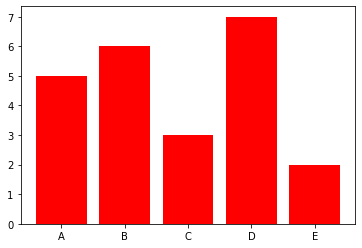

In [52]:
x_values=[5,6,3,7,2]
y_values=["A","B","C","D","E"]
plt.bar(y_values,x_values,color="red")
plt.show()

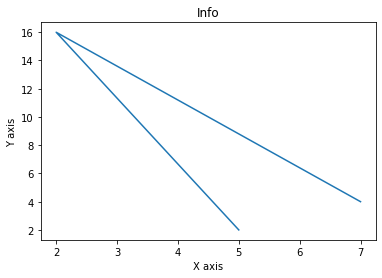

In [53]:
x = [5,2,7]
y = [2,16,4]
plt.plot(x,y)
plt.title('Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

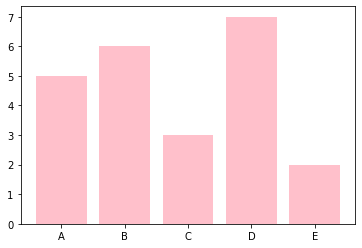

In [54]:
x_values = [5,6,3,7,2]
y_values = ["A", "B", "C", "D", "E"]
plt.bar(y_values,x_values, color = "pink")
plt.show()

Text(0.5, 1.0, 'Bikes details in BAR PLOTTING')

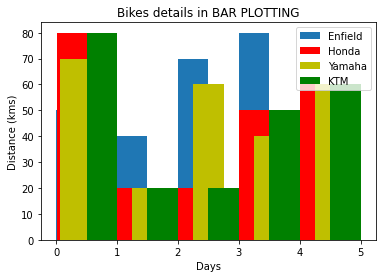

In [55]:
plt.bar([0.25,1.25,2.25,3.25,4.25],[50,40,70,80,20],
label="Enfield",width=.5)
plt.bar([0.26,1.25,2.25,3.25,4.25],[80,20,20,50,60],
label="Honda", color='r',width=.5)
plt.bar([0.31,1.5,2.5,3.5,4.5],[70,20,60,40,60],
label="Yamaha", color='y',width=.5)
plt.bar([.75,1.75,2.75,3.75,4.75],[80,20,20,50,60],
label="KTM", color='g',width=.5)
plt.legend()
plt.xlabel('Days')
plt.ylabel('Distance (kms)')
plt.title('Bikes details in BAR PLOTTING')

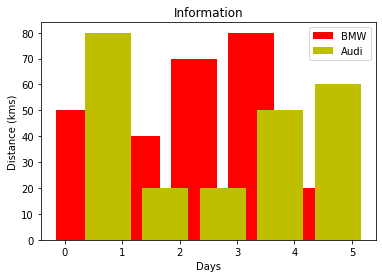

In [56]:
plt.bar([0.25,1.25,2.25,3.25,4.25],[50,40,70,80,20], label="BMW", color='r')
plt.bar([.75,1.75,2.75,3.75,4.75],[80,20,20,50,60], label="Audi", color='y')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Distance (kms)')
plt.title('Information')
plt.show()

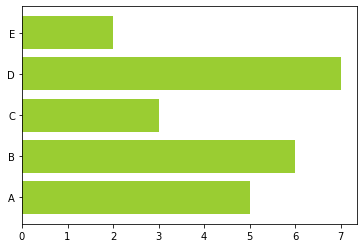

In [57]:
x_values = [5,6,3,7,2]
y_val = ["A", "B", "C", "D", "E"]
plt.barh(y_val,x_values, color ="yellowgreen")
# Adding an "h" after bar will flip the graph
plt.show()

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\RAVI\total\sem 5\nba.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


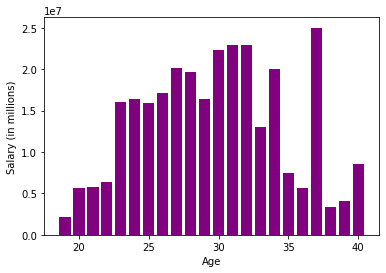

In [59]:
y_values = df['Salary']
x_values = df['Age']
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
#To plot a bar graph plt.bar() command is used
#This plots a bar graph between Age and Salaries of NBA players
plt.bar(x_values,y_values,color = "purple")
plt.show()

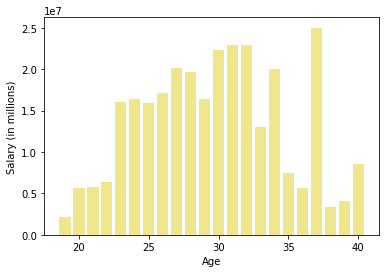

In [60]:
y_values = df['Salary']
x_values = df['Age']
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
# Making changes in the color field changes the colour of the graph
plt.bar(x_values,y_values,color = "khaki")
plt.show()

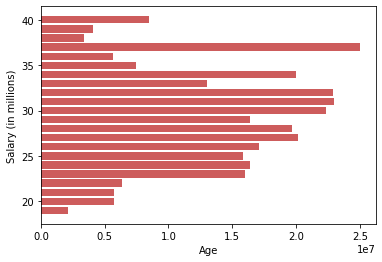

In [61]:
y_values = df['Salary']
x_values = df['Age']
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.barh(x_values,y_values,color = "indianred")
plt.show()

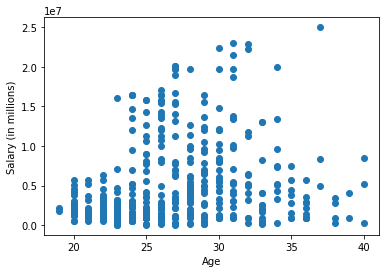

In [62]:
y_value=df['Salary']
x_values=df['Age']
#To display a scatter plot we use plt.scatter() command
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
#This displays a scatter plot between Age and Salaries of NBA players
plt.scatter(x_values,y_values)

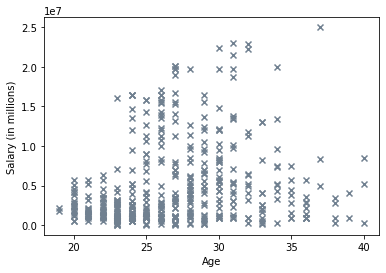

In [63]:
y_value=df['Salary']
x_values=df['Age']
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.scatter(x_values,y_values, color = "slategrey", marker = "x")

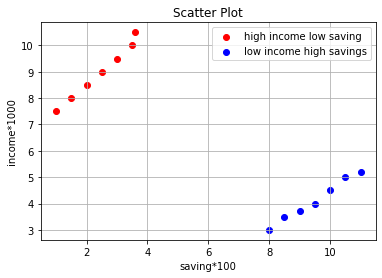

In [64]:
x = [1,1.5,2,2.5,3,3.5,3.6]
y = [7.5,8,8.5,9,9.5,10,10.5]
x1=[8,8.5,9,9.5,10,10.5,11]
y1=[3,3.5,3.7,4,4.5,5,5.2]
plt.scatter(x,y, label='high income low saving',color='r')
plt.scatter(x1,y1,label='low income high savings',color='b')
plt.xlabel('saving*100')
plt.ylabel('income*1000')
plt.title('Scatter Plot')
plt.legend()
#plt.show()
plt.grid()

Text(0.5, 1.0, 'Bike details in Pie Plot')

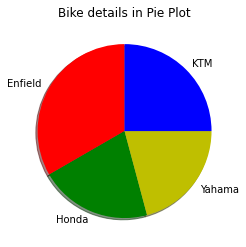

In [68]:
days = [1,2,3,4,5]
Enfield =[50,40,70,80,20]
Honda = [80,20,20,50,60]
Yahama =[70,20,60,40,60]
KTM = [80,20,20,50,60]
slices = [8,5,5,6]
activities = ['Enfield','Honda','Yahama','KTM']
cols = ['r','g','y','b']
plt.pie(slices, labels=activities, colors=cols, startangle=90, shadow= True)
plt.title('Bike details in Pie Plot')